# Predicting Heart Disease Using Machine Learning

### This notebook uses various Python-based machine learning libraries in order to build a model capable of predicting whether or not someone has heart disease based on their medical attributes

## Approach:

1. Problem Overview
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation


### Feature Description:

- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- sex (Male/Female)
- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
- -- Values: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]
- num: the predicted attribute


## Preparing The Tools:
We're using Pandas, Numpy, and Matplotlib for data manipulation

In [2]:
# Import tools:

# Data EDA and plotting

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

# Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import RocCurveDisplay


In [2]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python3


## Load Data

In [6]:
df = pd.read_csv('heart-disease.csv')
df.shape
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


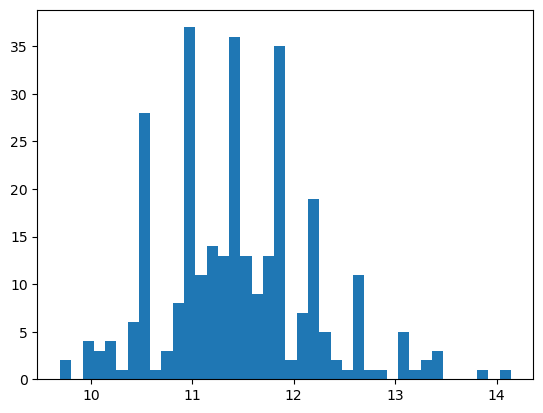

In [39]:
x = (df['trestbps'])
plt.hist(x**0.5, bins=40);

## Data Exploration 

1. What questions are we trying to answer?
2. What kinds of data do we have and how can we treat different types?
3. What is missing from the data and how can we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change, or remove features to get more out of the data

In [4]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

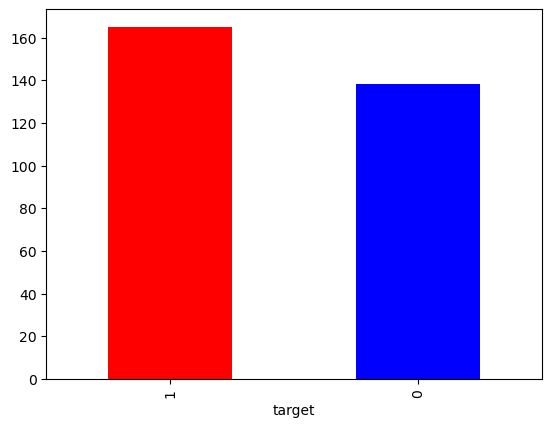

In [5]:
df['target'].value_counts().plot(kind = 'bar', color = ['red','blue'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### finding missing values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency x Sex

In [9]:
df['sex'].value_counts()
# could also be written as:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

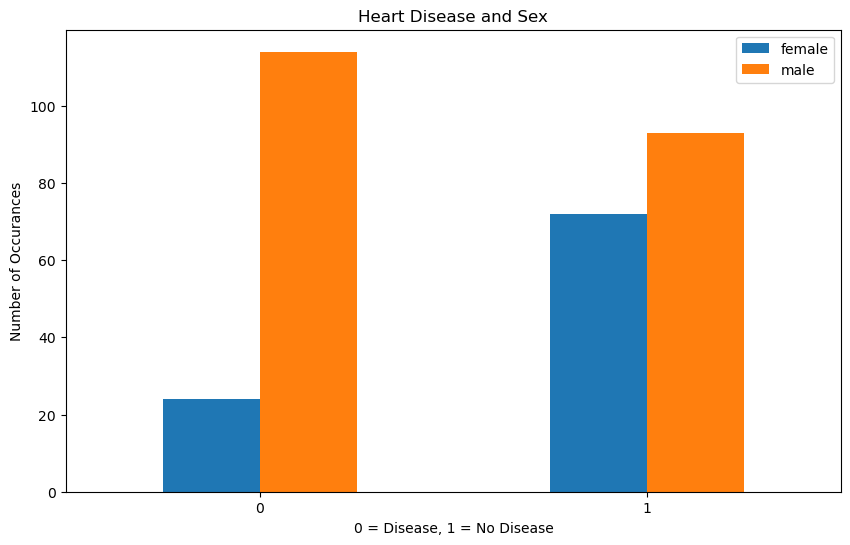

In [10]:
# Compare target column with sex column:

pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10,6))
plt.title("Heart Disease and Sex")
plt.xlabel('0 = Disease, 1 = No Disease')
plt.ylabel("Number of Occurances")
plt.legend(['female', 'male'])
plt.xticks(rotation = 0)


# Age vs Max Heart Rate

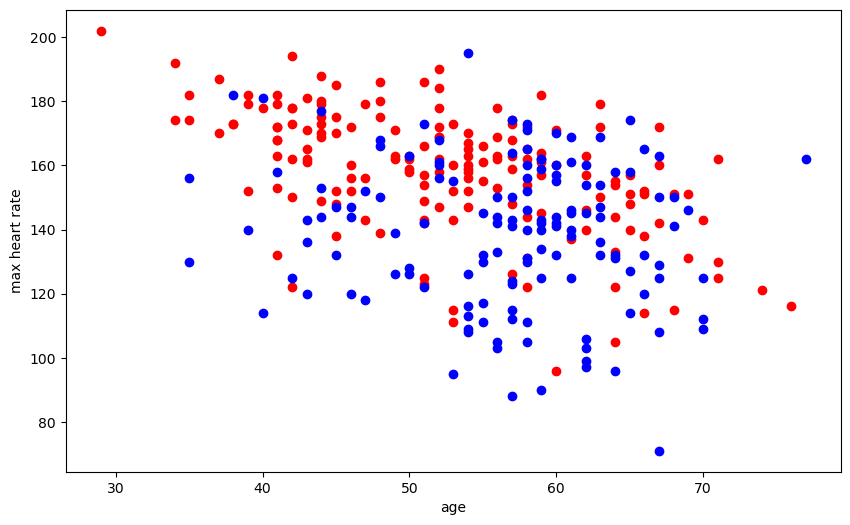

In [11]:
# Create another figure

plt.figure(figsize = (10,6))

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = 'red')
plt.xlabel('age')
plt.ylabel('max heart rate')

plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c = 'blue')

<Axes: ylabel='Frequency'>

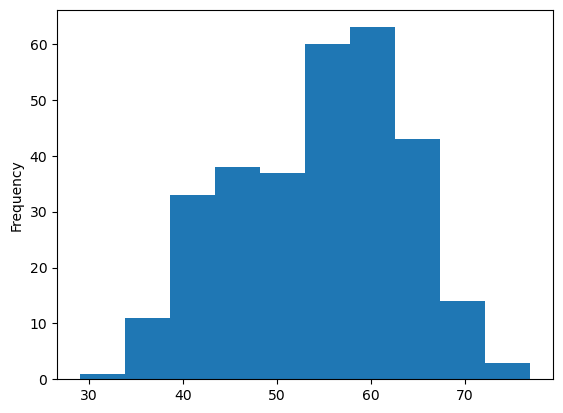

In [12]:
# Check the distribution of the age column 

df['age'].plot.hist()

### Heart Disease Frequency x Chest Pain Type

Text(0, 0.5, '0 = disease, 1 = no disease')

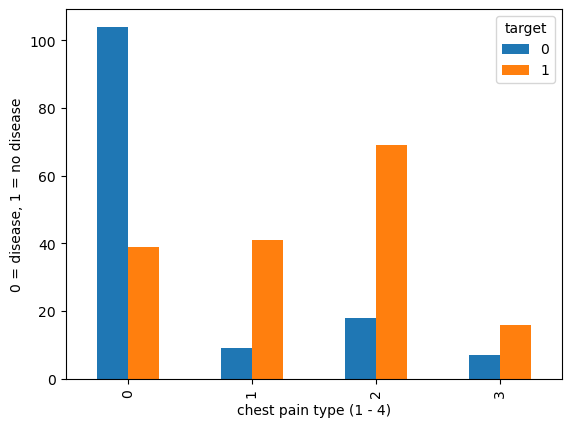

In [13]:
pd.crosstab(df.cp, df.target).plot(kind = 'bar')
plt.xlabel('chest pain type (1 - 4)')
plt.ylabel('0 = disease, 1 = no disease')

## Correlation Matrix

### via seaborn heatmap

In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


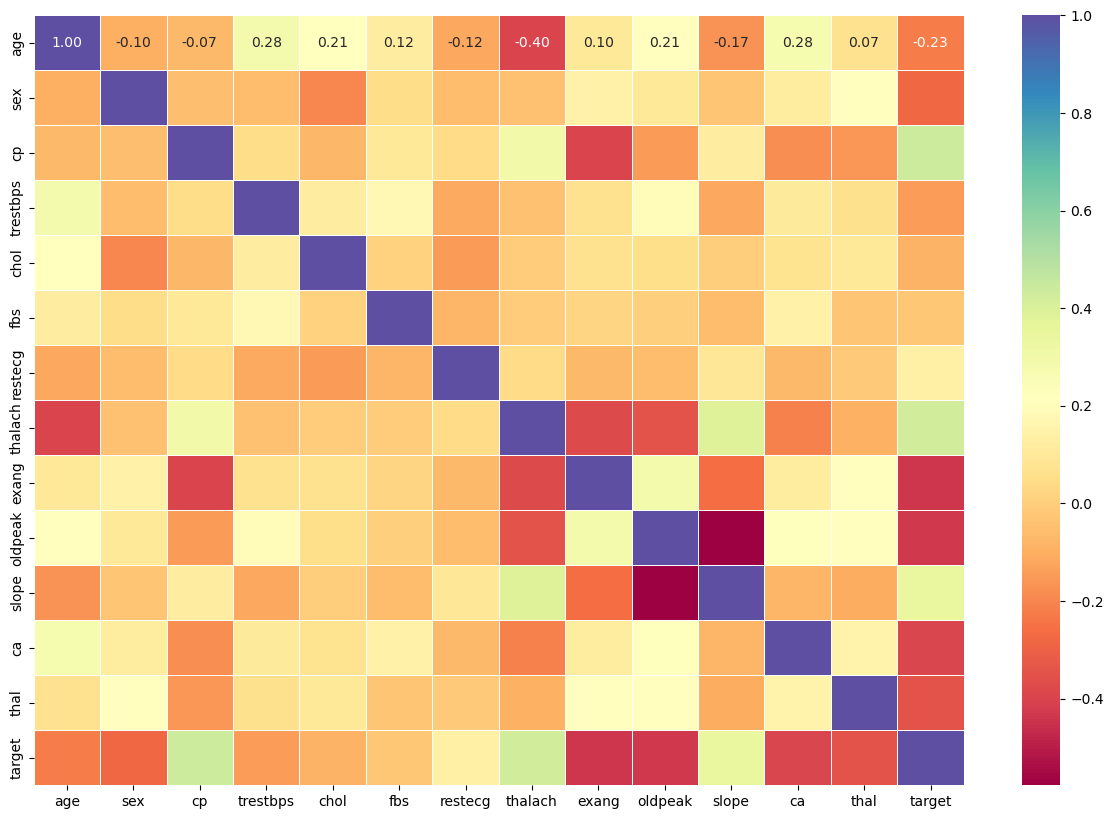

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "Spectral")

## Data Splits

In [16]:
X = df.drop('target', axis = 1)
y = df['target']
X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

## Test and Train data split with 20% test size

In [17]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Potential Model Comparison
1. Logistic Regression
2. RandomForestClassifier
3. KNearestNeighbors Classifier

In [18]:
# Put models in dictionary
models = {'Logistic Regression': LogisticRegression(max_iter = 1000),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score 

def fit_and_score(models, X_test, X_train, y_test, y_train):
    """
    Fits and evaluates multiple models simulaneously
    Models: a dictionary of selected models
    X_test:
    X_train:
    y_test:
    y_train
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

heart_disease_scores = fit_and_score(models, X_test, X_train, y_test, y_train)

In [19]:
heart_disease_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

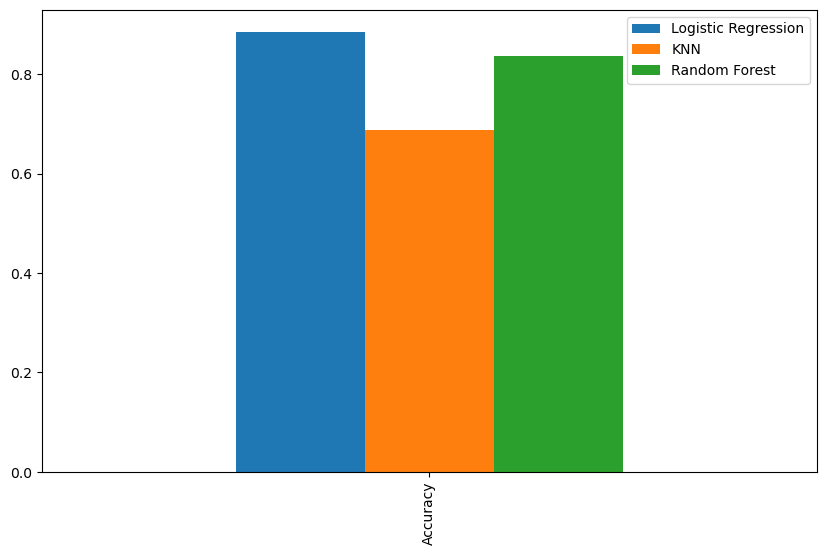

In [20]:

model_comparison = pd.DataFrame(heart_disease_scores, index=['Accuracy'])
model_comparison.plot(kind='bar', figsize = (10, 6))

# Model Selection & Next Steps:

1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross Validation
5. Precision
6. Recall
7. F1
8. Classification Report
9. ROC Curve
10. Area under curve (AUC)

In [21]:
# Classification Report
#LogReg = LogisticRegression(n_iter = 1000) 
#y_preds = LogReg
#print(classification_report(y_test, y_preds)

In [29]:
# Tuning KNN Hyperparameters:

train_scores = []
test_scores = []

neighbors = range(1, 21)

KNN = KNeighborsClassifier()

for i in neighbors:
    KNN.set_params(n_neighbors = i)
    KNN.fit(X_train, y_train)
    train_scores.append(KNN.score(X_train, y_train))
    test_scores.append(KNN.score(X_test, y_test))

Maximum KNN Model Score: 75.41%


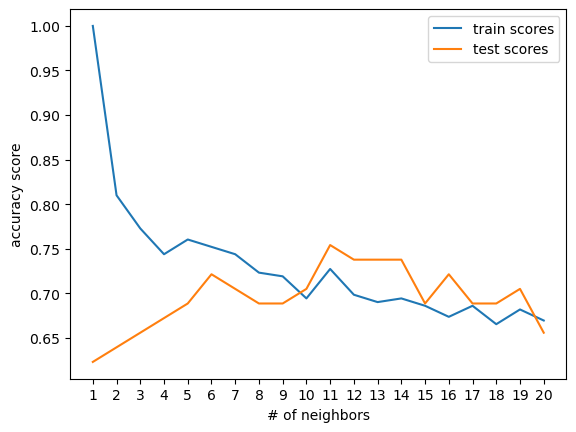

In [28]:
plt.plot(neighbors, train_scores, label = 'train scores')
plt.plot(neighbors, test_scores, label = 'test scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("# of neighbors")
plt.ylabel('accuracy score')
plt.legend()

print(f"Maximum KNN Model Score: {max(test_scores)*100:.2f}%")

# Hyperparameter Tuning with RandomizedSearchCV

1. Logistic Regression
2. Random Forest Classifier
   

### Logistic Regression:
Parameters:
1. C
2. Solver

In [37]:
# Logistic Regression Hyperparameter Grid:

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}


# Random Forest Classifier Hyperparameter Grid:

rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
            "max_depth": [None, 3, 5, 10],
            "max_features": ['log2', 'sqrt'],
            "min_samples_leaf": np.arange(1, 20, 2),
            "min_samples_split": np.arange(2, 20, 2)
}


In [38]:
# Cross Validate and Tune Logistic Regression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions = log_reg_grid, cv=5, n_iter=20, verbose=True)

# Fit Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [43]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [46]:
# Tune Random Forest Classifier:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv = 5, verbose = True, n_iter=20)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_features': 'log2',
 'max_depth': 3}

In [48]:
rs_rf.score(X_test, y_test)

0.8688524590163934

# Hyperparameter Tuning with GridSearchCV

In [73]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid = log_reg_grid, verbose=True, cv=5)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [74]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [75]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [76]:
gs_log_reg.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)>

# Evaluation beyond accuracy:

- ROC curve and AUC
- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1

++ cross-validation where applicable

In [78]:
y_preds = gs_log_reg.predict(X_test)

Text(0.5, 1.0, 'ROC Curve')

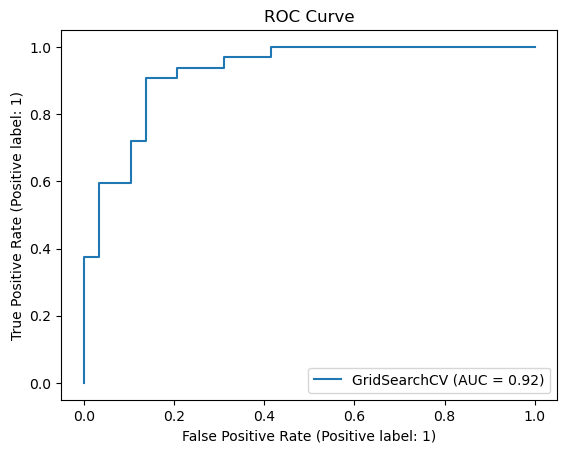

In [87]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.title("ROC Curve")

In [108]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


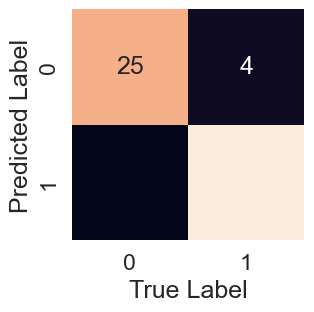

In [109]:
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                    annot=True, 
                    cbar = False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    bottom, top = ax.get_ylim()
    ax.set_ylim()

plot_conf_matrix(y_test, y_preds)

## Classification Report

In [112]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Caluculate Evaluation Metrics Using Cross-Validation

GridSearchCV object retains best parameters

In [161]:
# Check best 
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [162]:
clf = LogisticRegression(C = .23357214690901212, solver = 'liblinear')

In [163]:

precision = np.mean(cross_val_score(clf, X, y, scoring='precision'))
f1 = np.mean(cross_val_score(clf, X, y, scoring='f1'))
recall = np.mean(cross_val_score(clf, X, y, scoring='recall'))
accuracy = np.mean(cross_val_score(clf, X, y, scoring='accuracy'))

In [164]:
precision, f1, recall, accuracy

(0.8215873015873015,
 0.8705403543192143,
 0.9272727272727274,
 0.8479781420765027)

<Axes: title={'center': 'Cross_validated metrics'}>

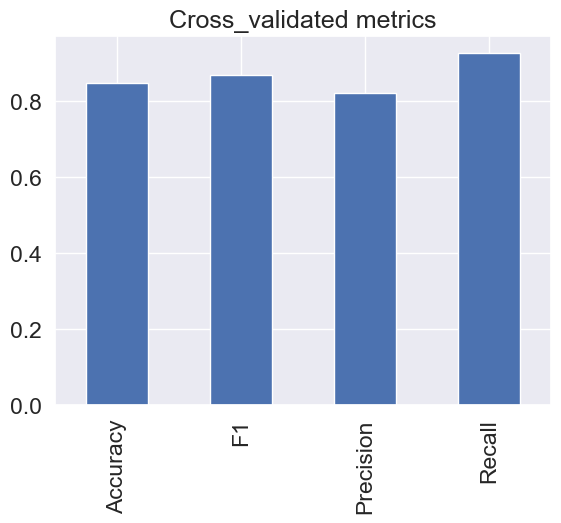

In [165]:
classificationreport = pd.DataFrame({"Accuracy": accuracy, 
                                    "F1": f1, 
                                    "Precision": precision, 
                                    "Recall": recall}, 
                                   index=[0])
classificationreport.T.plot.bar(title="Cross_validated metrics", legend=None)

# Feature Importance

In [168]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [169]:
clf = LogisticRegression(C =0.23357214690901212, solver = 'liblinear' )
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [171]:
# Check Coeffecients
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [177]:
# match coef to columns:
feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

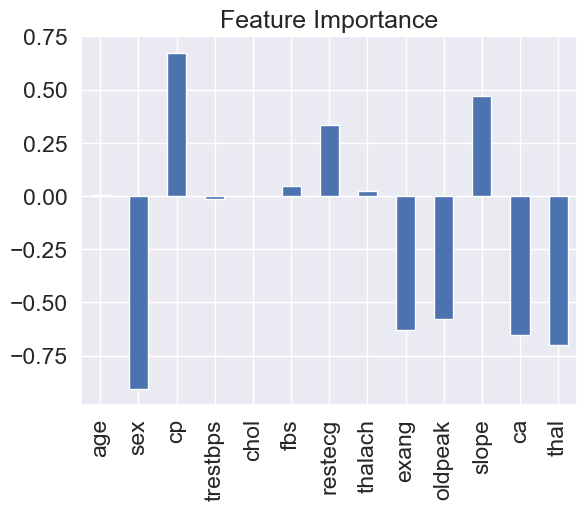

In [183]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

# Modeling with Catboost vs. XGBoost vs. LightGBM

In [184]:
from catboost import CatBoostClassifier